In [2]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

In [3]:
pion_features_data = pd.read_pickle("new_combined_data_pion_ene_std.pkl")
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062..."
...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3...."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3...."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366..."


In [4]:
def features(df):
    return np.array(list(df.lay_energy) + list(df.totEne_std)  )

In [5]:
pion_features_data["features"] = pion_features_data.apply(features, axis=1)
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10...","[0.6774013042449951, 3.8306031227111816, 0.745..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53...","[2.0719006061553955, 2.016815185546875, 1.2768..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3...","[0.9237810969352722, 1.8481943607330322, 1.052..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681...","[1.3247671127319336, 1.2322539389133453, 1.167..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062...","[0.8254274129867554, 1.221725344657898, 1.0039..."
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877..."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276..."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157..."


In [6]:
pion_features_data.loc[(pion_features_data.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,20.0,19.872639
std,0.0,0.781677
min,20.0,1.048469
25%,20.0,19.842665
50%,20.0,19.964919
75%,20.0,20.090376
max,20.0,21.095812


In [7]:
pion_features_data.loc[(pion_features_data.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,50.0,49.771790
std,0.0,1.677904
min,50.0,0.080586
25%,50.0,49.628825
50%,50.0,49.925409
75%,50.0,50.234388
max,50.0,51.249313


In [8]:
pion_features_data.loc[(pion_features_data.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,100.0,99.504616
std,0.0,3.936173
min,100.0,0.118692
25%,100.0,99.279066
50%,100.0,99.858723
75%,100.0,100.475655
max,100.0,101.468369


In [9]:
pion_features_data.loc[(pion_features_data.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,200.0,198.947159
std,0.0,8.619056
min,200.0,0.114726
25%,200.0,198.573349
50%,200.0,199.755440
75%,200.0,200.999344
max,200.0,202.769089


In [10]:
pion_features_data.loc[(pion_features_data.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy
count,99505.0,99505.000000
mean,300.0,298.197784
std,0.0,15.282945
min,300.0,0.067563
25%,300.0,297.836914
50%,300.0,299.590942
75%,300.0,301.492371
max,300.0,304.126709


In [11]:
intr_resolution = np.array([0.781677/19.872637 , 1.677904/49.771793, 3.936173/99.504623, 8.619056/198.947144, 15.282945/298.197845])
intr_resolution

array([0.03933434, 0.03371195, 0.03955769, 0.04332335, 0.05125102])

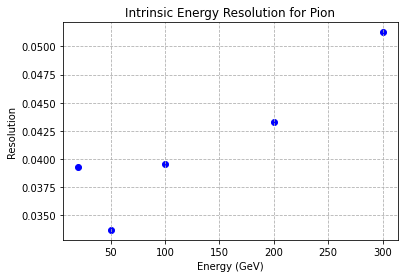

In [12]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, intr_resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Intrinsic Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [13]:
X_train = np.stack(pion_features_data.head(450000).features.values)
print(X_train.shape)
X_train

(450000, 84)


array([[6.77401304e-01, 3.83060312e+00, 7.45320022e-01, ...,
        5.65210791e+03, 4.29884577e+00, 4.27300167e+00],
       [2.07190061e+00, 2.01681519e+00, 1.27682829e+00, ...,
        7.87536926e+02, 3.52931738e+00, 4.04383469e+00],
       [9.23781097e-01, 1.84819436e+00, 1.05211258e+00, ...,
        0.00000000e+00, 3.13502049e+00, 3.66262460e+00],
       ...,
       [1.61844873e+00, 2.28397083e+00, 1.64020336e+00, ...,
        5.31511803e+01, 3.02373028e+00, 3.22974682e+00],
       [3.31987000e+00, 4.02279866e+00, 3.43073559e+00, ...,
        3.51938062e+03, 1.29567194e+00, 1.60971153e+00],
       [1.08771861e+00, 2.00837064e+00, 5.33550471e+00, ...,
        0.00000000e+00, 3.46462321e+00, 3.22059298e+00]])

In [14]:
from sklearn import preprocessing

In [15]:
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X

array([[-0.23689201, -0.22439289, -0.3157933 , ...,  3.67143182,
         0.74790068,  0.76549322],
       [-0.19681982, -0.26145643, -0.30866779, ...,  0.09014213,
        -0.08000327,  0.51885359],
       [-0.22981207, -0.26490208, -0.31168038, ..., -0.48964134,
        -0.50421107,  0.10857846],
       ...,
       [-0.20985017, -0.25599728, -0.30379631, ..., -0.45051153,
        -0.62394364, -0.35730373],
       [-0.16095831, -0.22046551, -0.27979207, ...,  2.10132126,
        -2.48309054, -2.10085727],
       [-0.22510118, -0.26162898, -0.25425635, ..., -0.48964134,
        -0.14960506, -0.3671555 ]])

In [16]:
print(sum(X[:,-1]))

-9.850026350122221e-11


In [17]:
Y = pion_features_data.head(450000).trueBeamEnergy.values
print(Y)
Y.shape

[302.02863   99.57724  199.08817  ...  99.85324   98.8405    49.406387]


(450000,)

In [18]:
from tensorflow.python import keras
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [16]:


    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': 64,
              'optimizer':"RMSprop",
              'activation':"LeakyReLU",
              'lr': 0.0000284131,
              'units_per_layer': 2048,
              'num_hidden_layers': 1,
              'dropout': 0.00761087,
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"[ene,std]input"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[84]),
        keras.layers.LeakyReLU(alpha=0.3),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu) 
    ])

    optimizer = tf.keras.optimizers.RMSprop(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-169
Epoch 1/50
5625/5625 [==============================] - 22s 4ms/step - loss: 14797.3945 - val_loss: 7471.0947
Epoch 2/50
5625/5625 [==============================] - 22s 4ms/step - loss: 3744.4270 - val_loss: 1397.5247
Epoch 3/50
5625/5625 [==============================] - 21s 4ms/step - loss: 1000.7550 - val_loss: 731.3439
Epoch 4/50
5625/5625 [==============================] - 22s 4ms/step - loss: 644.0387 - val_loss: 573.6497
Epoch 5/50
5625/5625 [==============================] - 21s 4ms/step - loss: 549.7170 - val_loss: 520.8732
Epoch 6/50
5625/5625 [==============================] - 22s 4ms/step - loss: 512.8286 - val_loss: 495.8615
Epoch 7/50
5625/5625 [==============================] - 22s 4ms/step - loss: 492.6440 - val_loss: 479.4060
Epoch 8/50
5625/5625 [==============================] - 22s 4ms/step - loss: 478.7204 - val_loss: 468.1062
Epoch 9/50
5625/5625 [==============================] - 22s 4ms/step - loss: 468.0

2021-01-31 16:14:15.385549: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-31 16:14:15.408847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-31 16:14:15.409207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-01-31 16:14:15.409361: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nitish/Root/lib:/home/nitish/Root/lib/:
2021-01-31 16:14:15.409762: W tensorflow/stream_executor/platfor

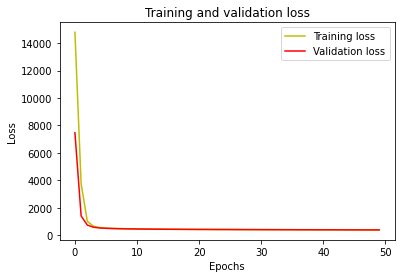

In [17]:
l = history.history['loss']
vl = history.history['val_loss']

epochs = range( len(l) )
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
units_per_lay=[256, 512, 1024]

b_size = [32, 64, 128]

np.random.randint(4)

1

In [20]:
lr = np.exp(-np.random.uniform(6.5, 10, 5))
dropout = np.random.uniform(0.2, 0.5, 5)

units_per_layer = [units_per_lay[np.random.randint(3)] for i in range(5)]
batch_size = [b_size[np.random.randint(3)] for i in range(5)]

print(lr)
print(dropout)
print(units_per_layer)
print(batch_size)

[4.79272888e-04 5.56300889e-04 5.97571049e-05 4.45876249e-04
 3.26539854e-04]
[0.44011781 0.42637086 0.23122198 0.26724169 0.21544512]
[512, 512, 1024, 512, 1024]
[128, 32, 32, 128, 64]


In [ ]:
train_loss=[]
val_loss=[]

for i in range(5):

    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': batch_size[i],
              'optimizer':"adam",
              'activation':"relu",
              'lr': lr[i],
              'units_per_layer': units_per_layer[i],
              'num_hidden_layers': 2,
              'dropout': dropout[i],
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"[ene,std]input"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[84], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(params['units_per_layer'],activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu)
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])
    
    l = history.history['loss']
    vl = history.history['val_loss']
    train_loss.append(l)
    val_loss.append(vl)
    
    print(i+1)

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-188
Epoch 1/50
2813/2813 [==============================] - 17s 6ms/step - loss: 1257.9497 - val_loss: 371.3302
Epoch 2/50
2813/2813 [==============================] - 16s 6ms/step - loss: 534.5345 - val_loss: 367.1049
Epoch 3/50
2813/2813 [==============================] - 16s 6ms/step - loss: 505.4809 - val_loss: 347.2099
Epoch 4/50
2813/2813 [==============================] - 16s 6ms/step - loss: 487.2541 - val_loss: 328.6808
Epoch 5/50
2813/2813 [==============================] - 16s 6ms/step - loss: 474.9781 - val_loss: 310.2931
Epoch 6/50
2813/2813 [==============================] - 16s 6ms/step - loss: 464.9832 - val_loss: 294.3867
Epoch 7/50
2813/2813 [==============================] - 16s 6ms/step - loss: 457.5447 - val_loss: 289.7750
Epoch 8/50
2813/2813 [==============================] - 16s 6ms/step - loss: 449.4073 - val_loss: 287.1107
Epoch 9/50
2813/2813 [==============================] - 16s 6ms/step - loss: 444.4086 -

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-189
Epoch 1/50
11250/11250 [==============================] - 35s 3ms/step - loss: 743.0019 - val_loss: 336.0460
Epoch 2/50
11250/11250 [==============================] - 33s 3ms/step - loss: 499.8315 - val_loss: 319.7117
Epoch 3/50
11250/11250 [==============================] - 33s 3ms/step - loss: 475.2768 - val_loss: 305.7599
Epoch 4/50
11250/11250 [==============================] - 33s 3ms/step - loss: 459.6358 - val_loss: 295.2358
Epoch 5/50
11250/11250 [==============================] - 33s 3ms/step - loss: 450.2169 - val_loss: 297.6947
Epoch 6/50
11250/11250 [==============================] - 33s 3ms/step - loss: 440.1612 - val_loss: 283.2102
Epoch 7/50
11250/11250 [==============================] - 34s 3ms/step - loss: 432.3670 - val_loss: 280.7209
Epoch 8/50
11250/11250 [==============================] - 33s 3ms/step - loss: 427.3106 - val_loss: 276.5715
Epoch 9/50
11250/11250 [==============================] - 33s 3ms/step -

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-190
Epoch 1/50
11250/11250 [==============================] - 110s 10ms/step - loss: 1198.3522 - val_loss: 361.1526
Epoch 2/50
11250/11250 [==============================] - 109s 10ms/step - loss: 391.3390 - val_loss: 320.3971
Epoch 3/50
11250/11250 [==============================] - 108s 10ms/step - loss: 362.1700 - val_loss: 301.9713
Epoch 4/50
11250/11250 [==============================] - 109s 10ms/step - loss: 344.7297 - val_loss: 290.5869
Epoch 5/50
11250/11250 [==============================] - 109s 10ms/step - loss: 330.1447 - val_loss: 276.8770
Epoch 6/50
11250/11250 [==============================] - 109s 10ms/step - loss: 318.6507 - val_loss: 272.4943
Epoch 7/50
11250/11250 [==============================] - 108s 10ms/step - loss: 309.9953 - val_loss: 257.9019
Epoch 8/50
11250/11250 [==============================] - 117s 10ms/step - loss: 302.3784 - val_loss: 254.7939
Epoch 9/50
11250/11250 [==============================]

In [ ]:
n=0
l = train_loss[n-1]
vl = val_loss[n-1]

l = history.history['loss']
vl = history.history['val_loss']

epochs = range(1, len(l) + 1)
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
x_test_set = pion_features_data.tail(497521-450000)
x_test_set

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367...","[0.9292487502098083, 1.4994680881500244, 1.325..."
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892...","[1.0738681554794312, 1.0422312021255493, 0.782..."
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475...","[1.190887212753296, 0.9109857678413391, 8.9380..."
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5...","[5.315865874290466, 17.029596507549286, 0.9630..."
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2....","[17.302144557237625, 20.476891815662384, 63.49..."
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877..."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276..."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157..."


In [23]:
X_test = np.stack(pion_features_data.tail(497521-450000).features.values)
X_test.shape

(47521, 84)

In [24]:
X_test = preprocessing.StandardScaler().fit(X_train).transform(X_test)
X_test

array([[-0.22965495, -0.27202807, -0.30802151, ..., -0.32225404,
         0.18935929,  0.61707159],
       [-0.22549918, -0.28137139, -0.31529773, ..., -0.45983324,
         0.36511813,  1.14085352],
       [-0.22213653, -0.2840533 , -0.20596047, ...,  0.43831912,
         1.5478374 ,  0.93150918],
       ...,
       [-0.23491233, -0.28260153, -0.30867356, ..., -0.48964134,
        -0.55732449,  0.34637551],
       [-0.23121007, -0.28539236, -0.31026548, ..., -0.30311336,
         0.71991601,  0.41816252],
       [-0.21286162, -0.27695209, -0.30361101, ..., -0.43913   ,
         0.56912816,  0.9353299 ]])

In [25]:
x_test_set["predicted_energy"] = model.predict(X_test)
x_test_set

<ipython-input-25-ef7fa7c5f07b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_set["predicted_energy"] = model.predict(X_test)


,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features,predicted_energy
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367...","[0.9292487502098083, 1.4994680881500244, 1.325...",20.098141
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892...","[1.0738681554794312, 1.0422312021255493, 0.782...",96.437027
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475...","[1.190887212753296, 0.9109857678413391, 8.9380...",309.433594
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5...","[5.315865874290466, 17.029596507549286, 0.9630...",92.461609
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2....","[17.302144557237625, 20.476891815662384, 63.49...",16.907829
...,...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877...",49.247845
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946...",278.932159
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276...",97.612106
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157...",55.259830


In [26]:
x_test_set.loc[(x_test_set.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9424.0,9424.000000,9424.000000
mean,20.0,19.876648,22.978548
std,0.0,0.761921,10.579261
min,20.0,2.639390,0.000000
25%,20.0,19.842844,18.805928
50%,20.0,19.966789,21.012579
75%,20.0,20.091725,23.629172
max,20.0,21.095812,104.558861


In [27]:
x_test_set.loc[(x_test_set.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9493.0,9493.000000,9493.000000
mean,50.0,49.782413,50.726383
std,0.0,1.594328,7.825675
min,50.0,18.020077,19.767757
25%,50.0,49.628960,45.974857
50%,50.0,49.934292,50.190765
75%,50.0,50.241192,54.415863
max,50.0,50.966721,128.562332


In [28]:
x_test_set.loc[(x_test_set.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,100.0,99.514053,99.188026
std,0.0,3.648157,9.606819
min,100.0,2.033318,6.656361
25%,100.0,99.278406,93.285725
50%,100.0,99.853195,99.159378
75%,100.0,100.473116,105.185184
max,100.0,101.392853,165.945023


In [29]:
x_test_set.loc[(x_test_set.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9512.0,9512.000000,9512.000000
mean,200.0,198.937271,199.021088
std,0.0,9.207854,22.165998
min,200.0,0.114726,3.927799
25%,200.0,198.600941,191.283016
50%,200.0,199.756813,201.139877
75%,200.0,201.011787,210.336952
max,200.0,202.454834,302.933716


In [30]:
x_test_set.loc[(x_test_set.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,300.0,297.819153,293.627258
std,0.0,18.115940,32.954071
min,300.0,1.008143,6.555769
25%,300.0,297.810028,291.448883
50%,300.0,299.584732,299.662430
75%,300.0,301.471245,306.086334
max,300.0,303.580872,333.143127


In [31]:
x_test_means = np.array([22.784109, 51.891449, 101.011993, 197.503555, 294.553650])
x_test_stds = np.array([10.859448, 8.626386, 10.710754, 21.374369, 34.456547])

resolution = x_test_stds/x_test_means
resolution

array([0.47662377, 0.16623907, 0.10603448, 0.10822271, 0.11697885])

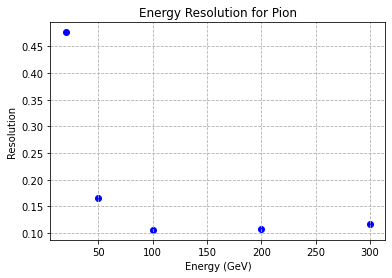

In [32]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [33]:
energy=[20, 50, 100, 200, 300]
pred_energy_pion = []

for i in energy:
    pred_energy_pion.append(x_test_set.loc[x_test_set.beamEnergy==i].predicted_energy.values)
    
pred_energy_pion

[array([20.09814 , 16.90783 , 20.187668, ..., 17.870037, 22.972279,
        21.672615], dtype=float32),
 array([61.2925  , 47.283833, 55.26698 , ..., 54.867317, 49.247845,
        55.25983 ], dtype=float32),
 array([ 96.43703,  92.46161, 107.95712, ...,  97.64194,  96.67526,
         97.61211], dtype=float32),
 array([183.58339, 202.9597 , 174.31471, ..., 214.75102, 206.5089 ,
        200.14069], dtype=float32),
 array([309.4336 , 285.2481 , 317.44345, ..., 301.09485, 278.93216,
        299.2748 ], dtype=float32)]

In [34]:
%jsroot on
c = ROOT.TCanvas()

H_pion_pred_20 = ROOT.TH1F("H_pion_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_50 = ROOT.TH1F("H_pion_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_100 = ROOT.TH1F("H_pion_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_200 = ROOT.TH1F("H_pion_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_300 = ROOT.TH1F("H_pion_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_pion[0].size):
    H_pion_pred_20.Fill(pred_energy_pion[0][i])
    
for i in range(pred_energy_pion[1].size):
    H_pion_pred_50.Fill(pred_energy_pion[1][i])
    
for i in range(pred_energy_pion[2].size):
    H_pion_pred_100.Fill(pred_energy_pion[2][i])
    
for i in range(pred_energy_pion[3].size):
    H_pion_pred_200.Fill(pred_energy_pion[3][i])
    
for i in range(pred_energy_pion[4].size):
    H_pion_pred_300.Fill(pred_energy_pion[4][i])
    


H_pion_pred_20.SetLineColor(1)
H_pion_pred_50.SetLineColor(2)
H_pion_pred_100.SetLineColor(3)
H_pion_pred_200.SetLineColor(4)
H_pion_pred_300.SetLineColor(5)




H_pion_pred_20.Draw()
H_pion_pred_50.Draw('same')
H_pion_pred_100.Draw('same')
H_pion_pred_200.Draw('same')
H_pion_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

In [35]:
pion_means = []
pion_stds = []

pion_means.append(H_pion_pred_20.GetMean())
pion_means.append(H_pion_pred_50.GetMean())
pion_means.append(H_pion_pred_100.GetMean())
pion_means.append(H_pion_pred_200.GetMean())
pion_means.append(H_pion_pred_300.GetMean())

pion_stds.append(H_pion_pred_20.GetStdDev())
pion_stds.append(H_pion_pred_50.GetStdDev())
pion_stds.append(H_pion_pred_100.GetStdDev())
pion_stds.append(H_pion_pred_200.GetStdDev())
pion_stds.append(H_pion_pred_300.GetStdDev())

print(pion_means)
pion_stds

[22.97854842880586, 50.72638598837592, 99.18801976249274, 199.0210878870084, 293.627265682666]


[10.578699683321465,
 7.825262435076465,
 9.606316267963601,
 22.164833885088868,
 32.952346143145064]

In [36]:
#for noemal equation
mean_ne = [17.2850781998911, 45.22257179115259, 93.4851491359478, 192.47197039519313, 293.6494407575138]

std_ne = [5.844814967813348,
 10.826584570065949,
 18.538464133416028,
 33.86404941053829,
 47.147552259907265]



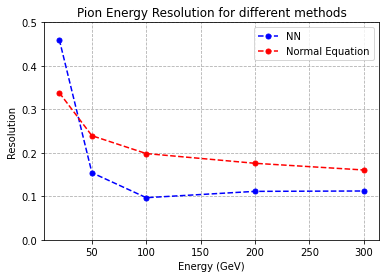

In [37]:
plt.plot(energy, (pion_stds)/np.array(pion_means), "b.", label="NN",  linestyle="--", color="b", markersize=10)
plt.plot(energy, np.array(std_ne)/np.array(mean_ne), "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

plt.ylim([0,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [38]:
true_beamEnergy_mean =np.array([19.872637, 49.771793, 99.504623, 198.947144, 298.197845])

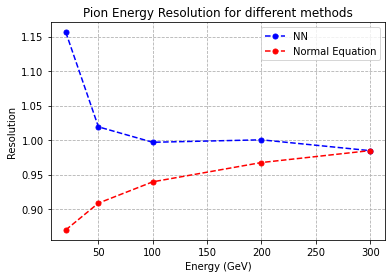

In [39]:
plt.plot(energy, np.array(pion_means)/true_beamEnergy_mean, "b.", label="NN",  linestyle="--", color="b", markersize=10)
plt.plot(energy, mean_ne/true_beamEnergy_mean, "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

#plt.ylim([0.5,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()